# Logistic Regression - Linear Classifier for Non-Linear Data

***Author: Rabindra Nepal***

*Email: rnepal2@unl.edu*

Format prepared by: M. R. Hasan


 How to classify non-linear data by logistic regression - a linear model?

In this notebook we will train a Logistic Regression classifier on a non-linear dataset. The main questions that we will try to understand is: 
- How does a linear classifier define the decision boundary for non-linear data?
- Is the decision boundary on a non-linear data linear?

For a dataset that is not linearly separable you need to augment the feature matrix by adding higher order polynomial terms. The augmented feature space allows the model to create a linear separation of the classes (i.e., to create a linear decision boundary). By using contour plots of the decision boundary on a high-dimensional (feature augmented) dataset, we will be able to understand the "linear classification" of a non-linear dataset by the Logistic Regression model.

For better understanding, we will create visualization of the decision boundary of the model.

To plot the decision boundary, we will use the the following two functions from "Logistic Regression-1-Binary Classification" notebook:
- decision_boundary_various_thresholds
- decision_boundary_class_colored



### Scikit-Learn Logistic Regression Model

We will need to set the following two parameters to use the Scikit-Learn LogisticRegression model.
- solver
- C

For the solver, we can  use the "liblinear" algorithm.

The strength of the regularization is controlled by the hyperparameter C. The higher the value of C, the less the model is regularized.


#### What we will do?
1. Train a linear model, evaluate train & test performance, plot decision boundary using two functions
2. Find the optimal polynomial model and train it, evaluate train & test performance, plot decision boundary using two functions

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt


from sklearn.datasets.samples_generator import make_circles

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import roc_curve, precision_recall_curve, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_validate, cross_val_predict, cross_val_score

In [2]:
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)

# Function for Plotting Decision Bounday 

Logistic Regression is a **linear classifier**. 

To better understand how Logistic Regression creates linear decision boundary, we need to  **visualize** it.

We provide two techniques for plotting the class decision boundary for a multi-class classification problem.

1. Using Various Thresholds for a Class Probability 
2. Using Class Prediction 

The 1st technique is useful for understanding the decision boundaries at various thresholds. It reveals the scope of the solution space. We use the function "decision_boundary_various_thresholds" to plot this decision boundary

The 2nd technique is simple and easy to extend for non-linear dataset. We will use it more often. We use the function "decision_boundary_class_colored" to plot this decision boundary. Note that for multi-class classification, the "plotDistanceFromHyperplane" attribute should be set to False.

In [3]:
def decision_boundary_various_thresholds(clf, X, manual_locations=None):
    
    # Get the min and max value of feature x1
    x1min, x1max = X[:,0].min() - 1, X[:, 0].max() + 1
    
    # Get the min and max value of feature x2
    x2min, x2max = X[:,1].min() - 1, X[:, 1].max() + 1
    
    # Create the mesh grid
    x1s = np.linspace(x1min, x1max, 100)
    x2s = np.linspace(x2min, x2max, 100)
    x1, x2 = np.meshgrid(x1s, x2s)

    # Create pairs of new points from the grid
    X_new = np.c_[x1.ravel(), x2.ravel()]

    # Compute the estimates for 2 classes for all new points
    y_proba = clf.predict_proba(X_new)

    
    # We only use the estimate for the class Iris-Virginica
    zz = y_proba[:, 1].reshape(x1.shape)

    # Generate the contour plot for the estimates of class 1
    contour = plt.contour(x1, x2, zz, cmap=plt.cm.brg)
    if manual_locations:
        plt.clabel(contour, inline=1, fontsize=12, manual=manual_locations)
    else:
        plt.clabel(contour, inline=1, fontsize=12)
    
    
def decision_boundary_class_colored(clf, X, plotDistanceFromHyperplane=False):
    
    # Get the min and max value of feature x1
    x1min, x1max = X[:,0].min() - 1, X[:, 0].max() + 1
    
    # Get the min and max value of feature x2
    x2min, x2max = X[:,1].min() - 1, X[:, 1].max() + 1
    
    # Create the mesh grid
    x1s = np.linspace(x1min, x1max, 100)
    x2s = np.linspace(x2min, x2max, 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    
    
    # Create pairs of new points from the grid
    X_new = np.c_[x1.ravel(), x2.ravel()]
    
    
    # Compute the class predictions for all new points
    y_pred = clf.predict(X_new).reshape(x1.shape)
    
    
    # Generate the contourf plot for the predictions
    plt.contourf(x1, x2, y_pred, cmap=plt.cm.bwr, alpha=0.2)
    
    
    if(plotDistanceFromHyperplane == True):
    
        # Compute the signed distance of a sample to the hyperplane for all new points
        y_decision = clf.decision_function(X_new).reshape(x1.shape)

        # Generate the contourf plot for the distance of all points from the hyperplane
        plt.contourf(x1, x2, y_decision, cmap=plt.cm.bwr, alpha=0.2)
    
    plt.colorbar()


## Synthetic Dataset

You will use the Scikit-Learn's "datasets.make_circles" function to generate a synthetic non-linear dataset that is suitable for investigating classification (as well as clustering) models. It provides better visualization of the classifier performance.


WE will use the following two parameters of the make_circles function:

- factor : Scale factor between inner and outer circle. Range 0 ~ 1.

- noise : Standard deviation of Gaussian noise added to the data.

## Load The Data and Visualiize 

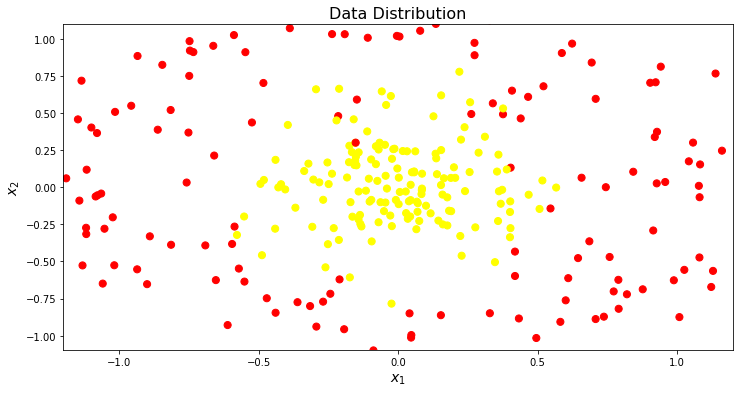

In [4]:
X, y = make_circles(300, factor=0.1, noise=0.25)

plt.figure(figsize=(12, 6))

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

plt.title("Data Distribution", fontsize=16)
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$x_2$", fontsize=14)
plt.axis([-1.2, 1.2, -1.1, 1.1])
plt.show()

## Split Data into Train-Test Set

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

### A Scatter Plot of Train and Test Data  

On the same figure plot both the train and test data. 

To separately show the test data, use black "edgecolors" and slightly bigger marker size (using the "s" parameter).

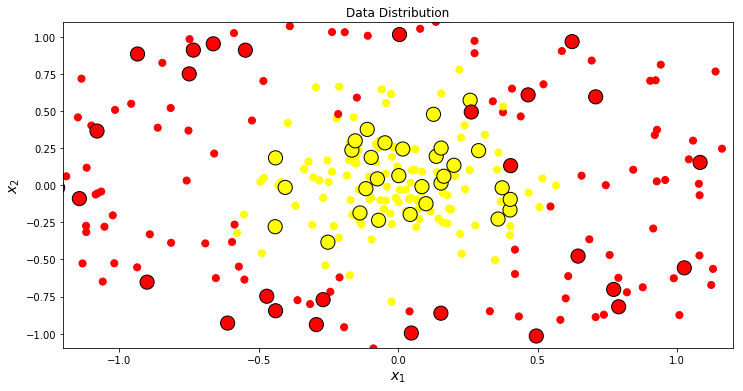

In [6]:
plt.figure(figsize=(12, 6))

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=50, cmap='autumn')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=200, cmap='autumn', edgecolors='black')

plt.title("Data Distribution", fontsize=12)
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$x_2$", fontsize=14)
plt.axis([-1.2, 1.2, -1.1, 1.1])
plt.show()

**Training a linear model**

- Compute Training accuracy
- Plot the decision boundary using two functions 
- Compute test accuracy, confusion matrix, precision, recall, f1 score and classification report

In [7]:
%%time

# searching the best parameters
param_grid = {'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], 
              'tol': [1e-3, 1e-4], 'max_iter':[10000, 20000],'C': [1, 10, 50]}

lg_reg = LogisticRegression()

lg_reg_cv = GridSearchCV(lg_reg, param_grid, scoring='accuracy', cv=3)
lg_reg_cv.fit(X_train, y_train)

params_optimal = lg_reg_cv.best_params_

print("Best Score (accuracy): %f" % lg_reg_cv.best_score_)
print("Optimal Hyperparameter Values: ", params_optimal)

Best Score (accuracy): 0.475000
Optimal Hyperparameter Values:  {'C': 1, 'max_iter': 10000, 'solver': 'liblinear', 'tol': 0.001}
Wall time: 732 ms


In [8]:
# best model 
model = LogisticRegression(C=1, max_iter=20000, solver='sag', tol=1e-3)
model.fit(X_train, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=20000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='sag',
          tol=0.001, verbose=0, warm_start=False)

In [9]:
# training accuracy
y_train_pred = model.predict(X_train)
print('Train accuracy: ', accuracy_score(y_train, y_train_pred))

Train accuracy:  0.5375


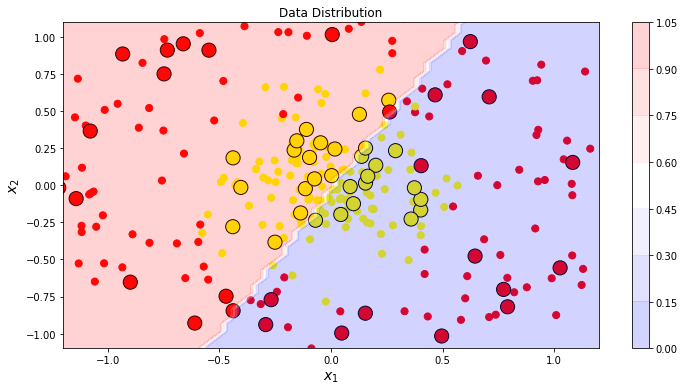

In [10]:

plt.figure(figsize=(12, 6))

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=50, cmap='autumn')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=200, cmap='autumn', edgecolors='black')
decision_boundary_class_colored(model, X_train)

plt.title("Data Distribution", fontsize=12)
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$x_2$", fontsize=14)
plt.axis([-1.2, 1.2, -1.1, 1.1]);

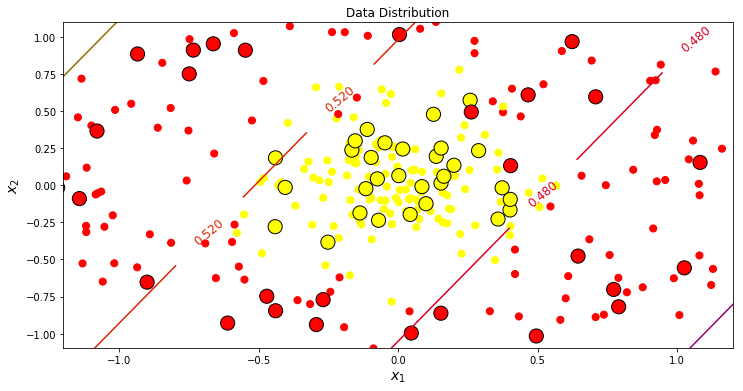

In [11]:
plt.figure(figsize=(12, 6))

manual_locations = [(-0.75, -0.1), (0, 0), (0.5, 0), (1.1, 0.9)]
decision_boundary_various_thresholds(clf=model, X=X_train, manual_locations=manual_locations)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=50, cmap='autumn')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=200, cmap='autumn', edgecolors='black')

plt.title("Data Distribution", fontsize=12)
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$x_2$", fontsize=14)
plt.axis([-1.2, 1.2, -1.1, 1.1])
plt.show()

In [12]:
# prediction on test dataset

y_test_pred = model.predict(X_test)
print('test accuracy: ', accuracy_score(y_test, y_test_pred))
print('test precision: ', precision_score(y_test, y_test_pred))
print('test recall: ', recall_score(y_test, y_test_pred))
print('test F1-score: ', f1_score(y_test, y_test_pred))
print('test confusion matrix: \n', confusion_matrix(y_test, y_test_pred))
print('test confusion matrix: \n', classification_report(y_test, y_test_pred))

test accuracy:  0.5166666666666667
test precision:  0.5161290322580645
test recall:  0.5333333333333333
test F1-score:  0.5245901639344263
test confusion matrix: 
 [[15 15]
 [14 16]]
test confusion matrix: 
               precision    recall  f1-score   support

           0       0.52      0.50      0.51        30
           1       0.52      0.53      0.52        30

   micro avg       0.52      0.52      0.52        60
   macro avg       0.52      0.52      0.52        60
weighted avg       0.52      0.52      0.52        60



- Choosing the optimal polynomial model after following experiment:

Split the training data into training and validation fold (80%-20%). Vary the degree of the polynomial and train the Logistic Regression model using the training fold data. Then, compute the accuracy (use the "score" function) for the validation fold data using the models with varying degree. Finally, plot the accuracy values against the varying degree. From this plot find the optimal degree (that gives the highest validation fold accuracy).

Then we can: 
- Train the optimal polynomial model
- Compute Training accuracy
- Plot the decision boundary using two functions (there should be two plots)
- Compute test accuracy, confusion matrix, precision, recall, f1 score and classification report




#### Split Training data into Traing and Validation Fold

In [31]:
# splitting training data into training and validation sets

X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

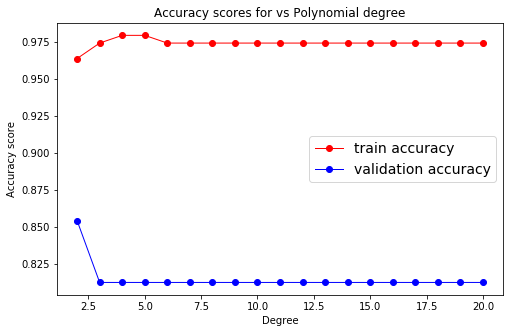

In [32]:
# RMSE vs. Degree Curve

degrees = np.arange(2, 21)
train_accuracies, val_accuracies = [], []
for degree in degrees:
    
    lg_reg = LogisticRegression(C=10, max_iter=1000, solver='liblinear', tol=1e-4)
    model = make_pipeline(PolynomialFeatures(degree, include_bias=False), StandardScaler(), lg_reg) 
    model.fit(X_tr, y_tr)
       
    # Make prediction 
    y_train_predicted = model.predict(X_tr)
    y_val_predicted = model.predict(X_val)
    
    # mse calculation
    train_accuracies.append(accuracy_score(y_tr, y_train_predicted))
    val_accuracies.append(accuracy_score(y_val, y_val_predicted))
   
# plotting
plt.figure(figsize=(8, 5))   
plt.plot(degrees, train_accuracies, "ro-", alpha=1.0, linewidth=1.0, label="train accuracy")
plt.plot(degrees, val_accuracies, "bo-", alpha=1.0, linewidth=1.0, label="validation accuracy")    
plt.legend(loc="best", fontsize=14) 
plt.xlabel("Degree")
plt.ylabel("Accuracy score")
plt.title("Accuracy scores for vs Polynomial degree")
plt.show()

#### polynomial complexity with cross-validation scores.....

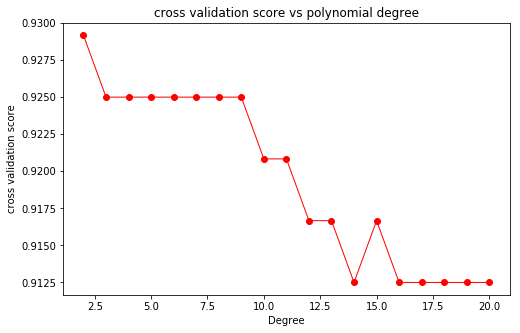

In [33]:
# cross validation scores vs. Degree Curve
degrees = np.arange(2, 21) 
scores = []
for degree in degrees:
    
    lg_reg = LogisticRegression(C=1, max_iter=1000, solver='liblinear', tol=1e-3)
    model = make_pipeline(PolynomialFeatures(degree, include_bias=False), StandardScaler(), lg_reg)
    
    crossval_scores = cross_val_score(model, X_train, y_train, cv=5)
    scores.append(crossval_scores.mean())
   
plt.figure(figsize=(8, 5))   
plt.plot(degrees, scores, "ro-", alpha=1.0, linewidth=1.0)
plt.xlabel("Degree")
plt.ylabel("cross validation score")
plt.title("cross validation score vs polynomial degree")
plt.show()

#### Model Selection: Optimal Polynomial Degree

 From the polynomial complexity graphs above, it is clear that the polynomial model performs best when degree = 2 or 3, then the performance starts decreasing due to overfitting. Since degree=2 is giving equally good performance as degree=3 model, we will be using the optimal polynomial degree of 2 in further studies. 

##  The Best Model
- Train the optimal polynomial model
- Compute Training accuracy
- Plot the decision boundary using two functions 
- Compute test accuracy, confusion matrix, precision, recall, f1 score and classification report

In [16]:
lg_reg = LogisticRegression(C=1, max_iter=1000, solver='liblinear', tol=1e-4)
model = make_pipeline(PolynomialFeatures(degree=2, include_bias=False), StandardScaler(), lg_reg)   
model.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logisticregression', LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False))])

In [17]:
print('Training accuracy: ', accuracy_score(y_train, model.predict(X_train)))

Training accuracy:  0.9458333333333333


#### Decision boundaries...

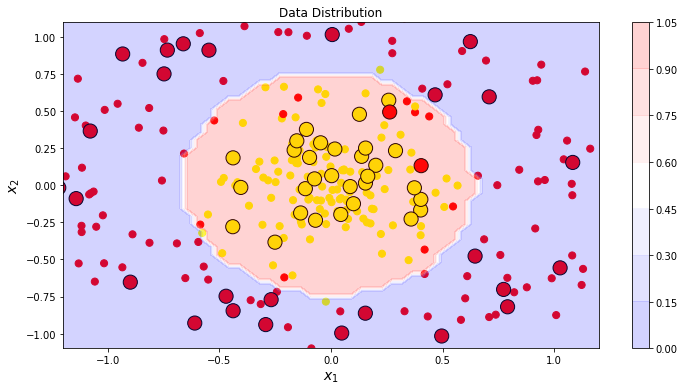

In [18]:
plt.figure(figsize=(12, 6))

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=50, cmap='autumn')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=200, cmap='autumn', edgecolors='black')
decision_boundary_class_colored(model, X_train)

plt.title("Data Distribution", fontsize=12)
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$x_2$", fontsize=14)
plt.axis([-1.2, 1.2, -1.1, 1.1]);

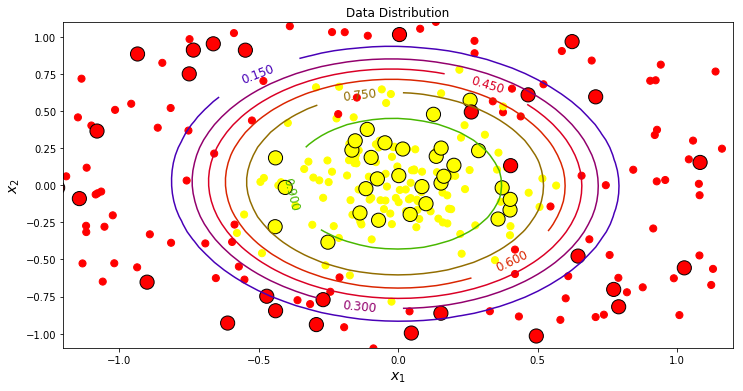

In [19]:
plt.figure(figsize=(12, 6))

#manual_locations = [(-0.75, -0.1), (0, 0), (0.5, 0), (1.1, 0.9)]
decision_boundary_various_thresholds(clf=model, X=X_train, manual_locations=None)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=50, cmap='autumn')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=200, cmap='autumn', edgecolors='black')

plt.title("Data Distribution", fontsize=12)
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$x_2$", fontsize=14)
plt.axis([-1.2, 1.2, -1.1, 1.1])
plt.show()

In [20]:
# prediction on test dataset

y_test_pred = model.predict(X_test)
print('test accuracy: ', accuracy_score(y_test, y_test_pred))
print('test precision: ', precision_score(y_test, y_test_pred))
print('test recall: ', recall_score(y_test, y_test_pred))
print('test F1-score: ', f1_score(y_test, y_test_pred))
print('test confusion matrix: \n', confusion_matrix(y_test, y_test_pred))
print('test confusion matrix: \n', classification_report(y_test, y_test_pred))

test accuracy:  0.9666666666666667
test precision:  0.9375
test recall:  1.0
test F1-score:  0.967741935483871
test confusion matrix: 
 [[28  2]
 [ 0 30]]
test confusion matrix: 
               precision    recall  f1-score   support

           0       1.00      0.93      0.97        30
           1       0.94      1.00      0.97        30

   micro avg       0.97      0.97      0.97        60
   macro avg       0.97      0.97      0.97        60
weighted avg       0.97      0.97      0.97        60



## Some Observations:

- Summarize your observations from the two tasks
- What type of decision boundary (linear/non-linear) is created by your polynomial model? Explain.


- **Some observations:**

We studied the use of a logistic regression model in the binary classification of dataset which is inherently separated into two classes by a non-linear boundary. In the first part, we worked with a pure linear model with the original linear dataset which separated the dataset into two classes by a linear boundary as expected. Due to the non-linear separation of two classes in the dataset, the performance of the model is poor - below 50% as expected.

We then tested with the polynomial model followed by the cross validation. By using a simple quadratic polynomial features, the performance of the model is significantly improved to $\sim 95$%. From the validation score vs polynomial degree plot above, it is clear that the model performs best when the polynomial degree is 2, but when the we keep on increasing the polynomial degree the model starts to suffer in its performance due to the overfitting as expected. 


- **Decision boundary:**

From the decision boundary plots seen above for the polynomial model, it is apparent that the decision boundary of the model is non-linear. Similar to the case studied for linear regression model before, an another linear model i.e. logistic regression, can also be used for the modelling of non-linear data eventhough it is a linear model. This is usually achieved by the use of non-linear basis function which augments the dataset into higher degree polynomial features. In this case, by just augmenting the features to polynomial degree of order 2, the decision boundary is modified as a non-linear (elliptical) which significantly improved the performance of our model.

The nomenclature is of "Logistic Regression" might look misleading as it is not a regression model rather a classification model. The decision boundaries separate different classes which are decided by the process very similar to linear regression model and hence the name logistic regression.

***Done!***